# Getting Data from Mastodon

> Mastodon is an ActivityPub-based, Twitter-like federated social network node. It provides an API that allows you to interact with every aspect of the platform.

In addition to commonly used social media platforms, Mastodon is decentralized. Anyone can host their own Mastodon server and connect it to other servers.

This Python Notebook serves as a brief introduction on how to use the Mastodon API to request posts.

Lets embark our journey !! 😉

<img src="https://i.imgur.com/WuW3Qli.jpeg" alt="Embark on DataScience" width="300"/>


## API-Wrapper: Mastodon.py

Apart from basic HTTP requests to the API, there is a simple Python wrapper available that implements the complete Mastodon API. The [documentation](https://mastodonpy.readthedocs.io/en/stable/index.html) provides good examples on how to use the library. Additionally, I recommend checking out [Martin's blog post](https://martinheinz.dev/blog/86) on using Mastodon.py, which provides a great hands-on approach.

In [1]:
# installing and importing the API wrapper

# !pip install Mastodon.py
import mastodon
from mastodon import Mastodon

## Selecting a Mastodon Instance and Getting the API Token

Since Mastodon is organized in a decentralized manner, you need to choose a node to serve as your home instance. The selection of your home node has a significant impact on what will be shown on your timeline. You can find an overview of all Mastodon servers via this [link](https://joinmastodon.org/de/servers). For this notebook, we will be using [troet.cafe](https://troet.cafe) as it is the largest German server with approximately 8.5k active users. Please note that some Mastodon servers may prohibit or provide limited API access.

Instead of using your username and password for authentication, it is recommended to use an application token. This token can be easily revoked and allows you to define the permissions of the application more precisely.

To create an account on the Mastodon instance, visit https://*your-instance-url*/settings/applications. There, you can create a new application and obtain a new token.

<img src="https://i.imgur.com/KYh5JMB.png" width=500 />

The next step is to obtain the access token from the newly created application. Please ensure that you do not share your tokens, as anyone with access can perform actions on your behalf.

<img src="https://i.imgur.com/B4n6RaL.png" width=500 />

To ensure that the access token is not shared with other people, in this use case, I recommend using a .env file, for futher information check this [blog](https://dev.to/jakewitcher/using-env-files-for-environment-variables-in-python-applications-55a1) out.

In [4]:
# !pip install python-dotenv
import os
from dotenv import load_dotenv
load_dotenv()

True

In [5]:
# setting up the Mastodon API
instance_url = "https://troet.cafe" 
access_token = os.getenv('TROET_CAFE_ACCESS_TOKEN')

m = Mastodon(access_token=access_token, api_base_url=instance_url)

## Getting Data

For the sake of social media analysis **we will focus only on getting data from the API**, please note that the wrapper can also be used to post data if you are interested in further details regarding that topic i can reccomend the documentation to you.

In [6]:
# get the local timeline limit spesifys the number of toots to get 40 is max
timeline = m.timeline_local(limit=40)

the return includes different attributes you can use for your analysis


in the following we are going to focus on the application used to create a posting 

In [8]:
# !pip install pandas
import pandas as pd


# transforming the data into a pandas dataframe for convenience
timelineDF = pd.DataFrame(timeline)
timelineDF[["content", "application", "created_at"]].head()

,content,application,created_at
0,<p>Meine Beine sehen fett aus😳</p>,"{'name': 'Tusky', 'website': 'https://tusky.app'}",2024-03-20 11:34:28.259000+00:00
1,<p>Es sind die Gegenpole</p><p>die ein Gleichg...,"{'name': 'Fedilab', 'website': 'https://fedila...",2024-03-20 11:33:24.459000+00:00
2,<p>Das dazu. Funny Story anyway.<br /><a href=...,"{'name': 'Tusky', 'website': 'https://tusky.app'}",2024-03-20 11:32:55.007000+00:00
3,<p>Frühling 🥳🥳🥳</p>,"{'name': 'Tusky', 'website': 'https://tusky.app'}",2024-03-20 11:32:11.756000+00:00
4,<p>mantra des tages:</p><p> &quot;was labers...,NaN,2024-03-20 11:28:51.895000+00:00


<Axes: title={'center': 'Applications used to post to Troet.cafe'}, xlabel='Number of posts', ylabel='Application'>

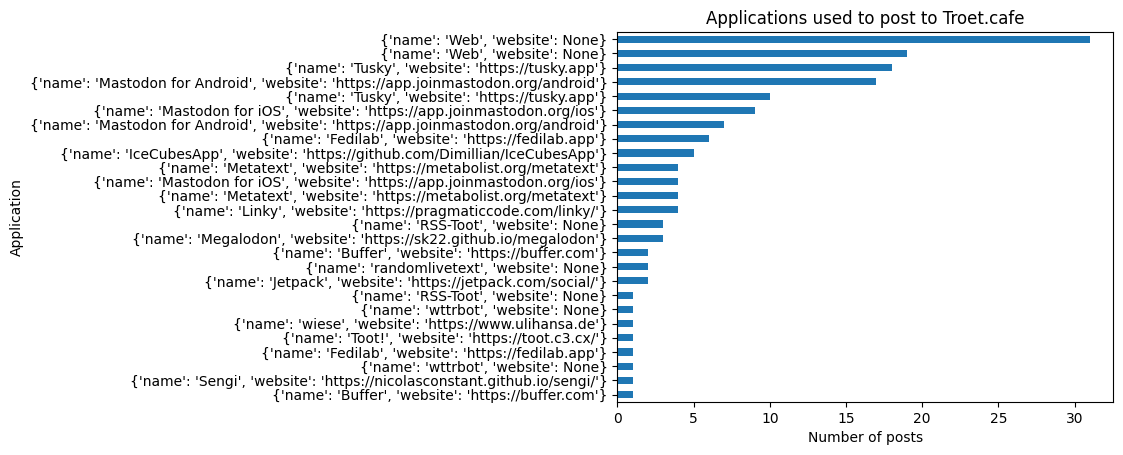

In [31]:
# !pip install matplotlib 
timelineDF["application"].value_counts().sort_values(ascending=True).plot(
    kind="barh", 
    title="Applications used to post to Troet.cafe",
    ylabel="Application",
    xlabel="Number of posts")

# creating a script to continious fetch for the latest posts and apend it to the timeline.json

> "der wurm muss nicht dem angler schmecken sondern dem fisch" prange 2024-03-20



112127430482695468

In [11]:
timelineDF = pd.read_csv("data/troet.cafe.csv")

In [26]:
# creating a script to continious fetch for the latest post and append it to the dataframe
# using the timeline_local(since_id) and the id of the last post in the dataframe
# to get the latest post
import time

while True:
    timeline = m.timeline_local(limit=40)
    timelineDF = pd.concat([timelineDF, pd.DataFrame(timeline)])
    timelineDF.drop_duplicates(subset="id", inplace=True)
    timelineDF.sort_values("id", inplace=True)
    timelineDF.reset_index(drop=True, inplace=True)
    print(len(timelineDF))
    time.sleep(300)

155
161
166


KeyboardInterrupt: 

In [28]:
# transforming the datatype
timelineDF["created_at"] = pd.to_datetime(timelineDF["created_at"])

<Axes: title={'center': 'Number of posts in 5 minute intervals'}, xlabel='Time', ylabel='Number of posts'>

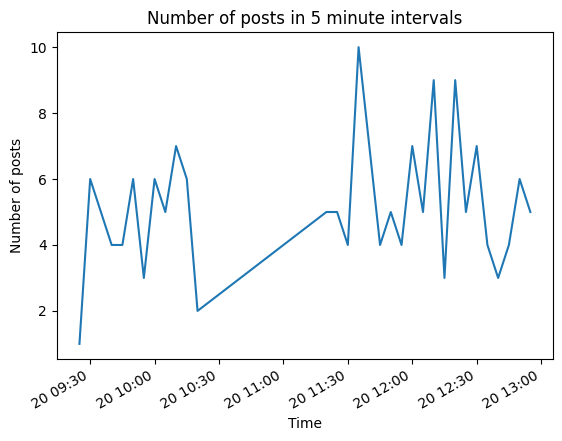

In [29]:
timelineDF["created_at"] = timelineDF["created_at"].dt.floor("5min")
timelineDF["created_at"].value_counts().sort_index().plot(
    kind="line", 
    title="Number of posts in 5 minute intervals",
    ylabel="Number of posts",
    xlabel="Time")

In [30]:
# save the data to a csv file
timelineDF.to_csv("data/troet.cafe.csv", index=False)